图片处理之滤波
===

# 1.噪声

# 1.1.什么是噪声

如果你把图像看作信号，那么噪声就是干扰信号。我们在采集图像时可能因为各种各样的干扰而引入图像噪声。

我们可以把图像看作一个函数，那么带有噪声的图像，就可以看作是原始图像函数与噪声函数相加的和。
$$f(x, y) = I(x, y) + noise$$

## 1.2.噪声的分类
基本上噪声分为高斯噪声和椒盐噪声

高斯噪声(Gaussian noise)是指它的概率密度函数服从高斯分布的一类噪声。如果一个噪声，它的幅度分布服从高斯分布，而它的功率谱密度又是均匀分布的，则称它为高斯白噪声。

常见的噪声有椒盐噪声(salt and pepper noise)。因为图像的像素点由于噪声影响随机变成了黑点(dark spot)或白点(white spot)，很想外国的“胡椒”，胡椒是黑色的，盐是白色的

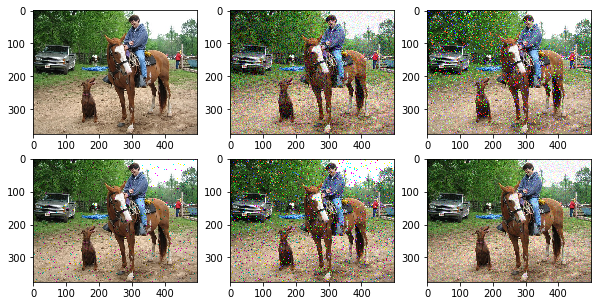

In [13]:
import cv2
import matplotlib.pyplot as plt
import skimage.util as su

img = cv2.imread("Images/01/09/02.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
row, column, channel = img.shape
 
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(2, 3, 1) 
plt.imshow(img)

plt.subplot(2, 3, 2)
plt.imshow(su.random_noise(img, mode='gaussian'))

plt.subplot(2, 3, 3)
plt.imshow(su.random_noise(img, mode='salt', amount=0.05))

plt.subplot(2, 3, 4)
plt.imshow(su.random_noise(img, mode='pepper', amount=0.01))

plt.subplot(2, 3, 5)
plt.imshow(su.random_noise(img, mode='s&p'))

plt.subplot(2, 3, 6)
plt.imshow(su.random_noise(img, mode='speckle'))

# 2.高斯滤波 - 去除噪声
高斯滤波器是一种可以使图像平滑的滤波器，用于去除噪声。可用于去除噪声的滤波器还有中值滤波器，平滑滤波器、LoG滤波器

高斯滤波器将重心像素周围的像素按照高斯分布加权平均进行平滑化。这样的（二维）权值通常被称为卷积核或者滤波器

但是，由于图像的长宽可能不是滤波器大小的整数倍，因此我们需要在图像的边缘补0。这种方法称作Zero Padding。并且权值（卷积核）要进行归一化操作($\sum g = 1$)。

权值$g(x,y,s)=\frac{1}{s \times \sqrt{2\pi} \times e^{-\frac{x^2+y^2}{2 \times s^2}}}$

标准差s=1.3的8近邻高斯滤波器如下
$$
K=\frac{1}{16} \times \begin{bmatrix}
1&2&1 \\
2&4&2 \\
1&2&1
\end{bmatrix}
$$